In [42]:
import numpy as np
#import matplotlib
#matplotlib.use('Agg');
import matplotlib.pyplot as plt
#plt.set_cmap('jet');
import random, os, sys, pandas, os, pickle
import argparse
from textwrap import wrap
%matplotlib inline

# UPDATE THIS
PATH_TO_STATS = "/network/home/simpsonb/gradmask/gradmask/logs/(model:(SimpleCNN:(flat_layer:200)),dataset:LungMSDDataset,optimizer:(Adam:(lr:0.001)),penalise_grad:contrast,shuffle:True,nsamples:64,batch_size:32,maxmasks:8,seed:1234)/stats/"

In [38]:
##############################################
##############################################
##############################################
##############################################
## below is code to plot the results of running this with "run.sh classify.ipynb"
## e.g "run.sh classify.ipynb -thing -nsamples 32 -seed 4"
## it writes a pickle file with the results for each run.


In [43]:
df = pandas.DataFrame()
for f in os.listdir(PATH_TO_STATS):
    d = (pickle.load(open(PATH_TO_STATS + f,"rb")))
    df = df.append(pandas.DataFrame(d))

In [44]:
df.shape

(10, 22)

In [45]:
df.head()

,batch_size,cuda,epoch,maxmasks,model,model_flat_layer,nsamples,optimizer,optimizer_lr,penalise_grad,...,test_dataset,test_dataset_mode,testauc,train_dataset,train_dataset_mode,trainloss,transform,valid_dataset,valid_dataset_mode,validauc
0,32,True,10,8,SimpleCNN,200,64,Adam,0.001,contrast,...,LungMSDDataset,test,0.50000,LungMSDDataset,train,9.355086,train,LungMSDDataset,valid,0.50000
1,32,True,10,8,SimpleCNN,200,64,Adam,0.001,contrast,...,LungMSDDataset,test,0.65625,LungMSDDataset,train,2.599338,train,LungMSDDataset,valid,0.34375
2,32,True,10,8,SimpleCNN,200,64,Adam,0.001,contrast,...,LungMSDDataset,test,0.56250,LungMSDDataset,train,1.897338,train,LungMSDDataset,valid,0.34375
3,32,True,10,8,SimpleCNN,200,64,Adam,0.001,contrast,...,LungMSDDataset,test,0.56250,LungMSDDataset,train,1.511363,train,LungMSDDataset,valid,0.34375
4,32,True,10,8,SimpleCNN,200,64,Adam,0.001,contrast,...,LungMSDDataset,test,0.50000,LungMSDDataset,train,1.453034,train,LungMSDDataset,valid,0.40625


In [50]:
print (df.train_dataset.unique())
print (df.penalise_grad.unique())
print (df.nsamples.unique())
# print (df.maskblur.unique())
print (df.maxmasks.unique())

['LungMSDDataset']
['contrast']
[64]
[8]


In [356]:
#df[(df.nsamples == 32) & (df.epoch == 100) & (df.dataset == "colon")]

In [61]:
df[(df.nsamples == 64) & (df.epoch == 10) & (df.train_dataset == "LungMSDDataset")].groupby(
    ["nsamples","epoch","penalise_grad", "maxmasks","optimizer_lr", "batch_size"]).count()

,,,,,,cuda,model,model_flat_layer,optimizer,seed,shuffle,test_dataset,test_dataset_mode,testauc,train_dataset,train_dataset_mode,trainloss,transform,valid_dataset,valid_dataset_mode,validauc
nsamples,epoch,penalise_grad,maxmasks,optimizer_lr,batch_size,,,,,,,,,,,,,,,,
64,10,contrast,8,0.001,32,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


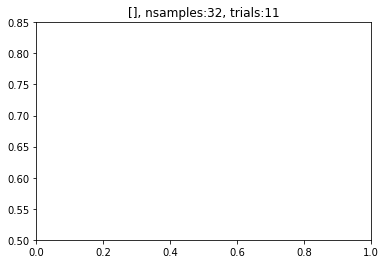

In [363]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df[(df.nsamples == 32) & 
              (df.maskblur == 3) & 
              (df.batchsize == 16) & 
              (df.annealinglambda == 2.0) & 
              (df.epoch < 800) &
              (df.dataset == "colon")].reindex()
for k,i in enumerate(sorted(subsetdata.thing.unique())):

    thisdata = subsetdata[subsetdata.thing == i]
    r = thisdata.groupby(["epoch"]).mean().plot(
        y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="gradmask")
plt.ylim(.5, 0.85);
#plt.xlim(0,500);

plt.title(str(subsetdata.dataset.unique()) + ", nsamples:" + str(thisdata.nsamples.unique()[0]) + 
          ", trials:" + str(thisdata.seed.unique().shape[0]));


In [364]:
#"num trials", subsetdata[subsetdata.thing == False].groupby(["epoch"]).count()

IndexError: single positional indexer is out-of-bounds

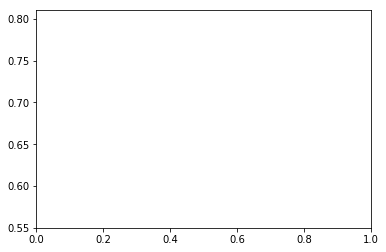

In [368]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df[(df.nsamples == 32) & 
              (df.maskblur == 3) & 
              (df.batchsize == 16) & 
              (df.annealinglambda == 1.0) & 
              (df.thingstyle == 1.0) & 
              (df.epoch < 800) &
              (df.dataset == "tnt")].reindex()
for k,i in enumerate(sorted(subsetdata.maxmasks.unique())):

    thisdata = subsetdata[subsetdata.maxmasks == i]
    r = thisdata.groupby(["epoch"]).mean().plot(
        y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="# masks used")
plt.ylim(.55, 0.81);
#plt.xlim(0,500);

params = subsetdata.drop(["trainloss", "validauc", "seed", "epoch"], axis=1).iloc[0].to_dict()
params = "\n".join(wrap(str(params), 60))
plt.title(str(params) + ", trials:" + str(thisdata.seed.unique().shape[0]));


{'annealinglambda': 1.0,
 'batchsize': 16,
 'dataset': 'colon',
 'lr': 0.001,
 'maskblur': 3,
 'maxmasks': 4,
 'nsamples': 32,
 'thing': True,
 'thingstyle': 1}

(999, 'num trials', 11)


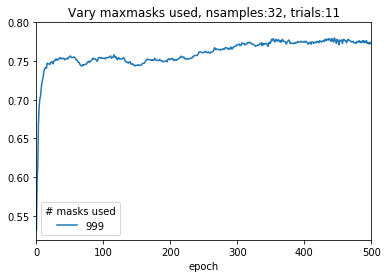

In [98]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df[(df.nsamples == 32) & 
              (df.thing == True) & 
              (df.maskblur == 2) & 
              (df.annealinglambda == 1.0) & 
              (df.dataset == "lung")].reindex()
for k,i in enumerate(sorted(subsetdata.maxmasks.unique())):

    thisdata = subsetdata[subsetdata.maxmasks == i]
    r = thisdata.groupby(["epoch"]).mean().plot(
        y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="# masks used")
#plt.ylim(.65, 0.81);
plt.xlim(0,500);

plt.title("Vary maxmasks used, nsamples:" + str(thisdata.nsamples.unique()[0]) + 
          ", trials:" + str(thisdata.seed.unique().shape[0]));


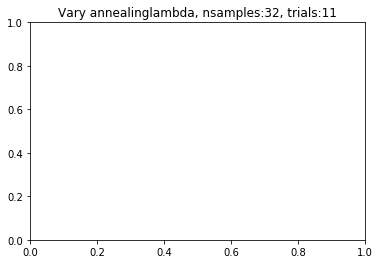

In [56]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df[(df.nsamples == 64) & 
              (df.thing == True) & 
              (df.maskblur == 3) & 
              (df.maxmasks == 64) & 
              (df.dataset == "lung")].reindex()
for k,i in enumerate(sorted(subsetdata.annealinglambda.unique())):

    thisdata = subsetdata[subsetdata.annealinglambda == i]
    r = thisdata.groupby(["epoch"]).mean().plot(
        y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="annealinglambda")
#plt.ylim(.65, 0.85);
#plt.xlim(0,600);

plt.title("Vary annealinglambda, nsamples:" + str(thisdata.nsamples.unique()[0]) + 
          ", trials:" + str(thisdata.seed.unique().shape[0]));


In [14]:
import json
import gradmask.utils.configuration as configuration
from collections import OrderedDict

cfg_file = "../../gradmask/config/lungmsd.yml"
config = configuration.load_config(cfg_file)
# config = json.dumps(cfg)

In [11]:
output_dict = {}
for mode in ['train', 'valid','test']:
    for key, item in config.items():
        if type(config[key]) == dict:
            # if the 'value' is actually a dict, iterate through and collect train/valid/test values
            try:
                # config is of the form main_key: train/test/valid: key_val: more_key_val_pairs
                sub_dict = config[key][mode]
                main_key_value = list(sub_dict.keys())[0]
                output_dict["{}_{}".format(mode, key)] = main_key_value
                sub_sub_dict = sub_dict[main_key_value] # e.g. name of optimiser, name of dataset
                for k, i in sub_sub_dict.items():
                    output_dict["{}_{}_{}".format(mode, key, k)] = i # so we don't have e.g. train_dataset_MSD_mode
            except:
                # config is of the form main_key: key_val: more_key_val_pairs e.g. optimiser: Adam: lr: 0.001
                sub_dict = config[key]
                main_key_value = list(sub_dict.keys())[0]
                output_dict[key] = main_key_value
                sub_sub_dict = sub_dict[main_key_value] # e.g. name of optimiser, name of dataset
                for k, i in sub_sub_dict.items():
                    output_dict["{}_{}".format(key, k)] = i
        else:
            # standard key: val pair
            output_dict[key] = item

In [18]:
OrderedDict(output_dict)

OrderedDict([('optimizer_lr', 0.001),
             ('model_flat_layer', 200),
             ('transform', 'valid'),
             ('maxmasks', 8),
             ('epoch', 10),
             ('model', 'SimpleCNN'),
             ('valid_dataset', 'LungMSDDataset'),
             ('optimizer', 'Adam'),
             ('valid_dataset_mode', 'valid'),
             ('penalise_grad', True),
             ('batch_size', 32),
             ('train_dataset', 'LungMSDDataset'),
             ('test_dataset_mode', 'test'),
             ('train_dataset_mode', 'train'),
             ('test_dataset', 'LungMSDDataset'),
             ('seed', 1234),
             ('shuffle', True),
             ('cuda', True),
             ('nsamples', 64)])